In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
import pandas as pd

In [4]:
pd.__version__

'1.0.3'

In [7]:
%ls

DLKERAS/
Deep Learning with Keras.pdf
Deep Learning with Python.pdf
Keras_Tutorial_PCJ-master/
QGIS_CookBook_2019.pdf
README.md
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
cnn.h5
d2l-ko.pdf
dataset/
ff_keras_전이학습 알아보기.ipynb
hello.py
keras-master/
logs/
mml-book_머신러닝수학책.pdf
model.h5
pima-indians-diabetes.csv
practical-gan-master/
tensorflow_tutorial.pdf
tf_kera_클래스로 모델을 정의하기 .ipynb
tf_keras _시퀀스와 함수 API로 모델 만들어보기 .ipynb
tf_keras _시퀀스와 함수 API로 모델로 다양한 레이어 계층 만들기.ipynb
tf_keras_functional 모델만들기_mnist.ipynb
tf_keras_functional 모델만들기_mnist_ 재사용가능하도록 정의_함수.ipynb
tf_keras_functional 모델만들기_mnist_ 재사용가능하도록 정의_함수_정확도 클래스.ipynb
tf_keras_mnist.ipynb
tf_keras_sequial모델 만들기_mnist 처리하기.ipynb
tf_keras_titanic 분석_등급_성별_요금.ipynb
tf_keras_titanic 분석_등급_성별_나이_요금.ipynb
tf_keras_v1_타이타닉 데이터 분석.ipynb
tf_keras_텐서 표현 알아보기.ipynb
tf_keras_텐서플로우와 케라스 버전확인하기.ipynb
tf_keras_선형회귀모델.ipynb
tf_keras_당뇨병데이터로  예측하기.ipynb
tf_keras_싱글레이어알아보기.ipynb
tf_kersa_tensorflow에서 케라스 실행하기.ipynb
winequality-red.csv
winequality-whit

In [8]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [9]:
white = pd.read_csv('winequality-white.csv', sep=';')

In [14]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
## 칼럼 설명 

'fixed acidity' : 주석산
'volatile acidity', : 초산
'citric acid',    : 구연산
'residual sugar', : 당도
'chlorides',        : 염화물(소금)
 'free sulfur dioxide', : 자유 아산화황(산화방지제, 방부제 역할)
'total sulfur dioxide', : 총 아산화황
'density',                   : 밀도
'pH',                          : 산도
'sulphates',               : 황산칼륨
 'alcohol',                  : 알코올 도수
'quality'                     : 품질


In [15]:
han_columns = ['주석산', '초산', '구연산', '당도', '소금', '산화방지제', '총아산화황', '밀도', '산도', '황산칼륨', '알코올도수','품질']

In [10]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
red.shape, white.shape

((1599, 12), (4898, 12))

In [13]:
red.columns == white.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [16]:
red_h = red.copy()

In [17]:
red_h.columns = han_columns

In [18]:
red_h.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
white_h = white.copy()

In [20]:
white_h.columns = han_columns

In [21]:
white_h.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
red_h['종류'] = 0

In [23]:
white_h['종류'] = 1

In [24]:
wine = pd.concat([red_h, white_h])

In [25]:
wine.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질,종류
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [26]:
wine.shape

(6497, 13)

In [33]:
wine['종류'].values_counts()

1    4898
0    1599
Name: 종류, dtype: int64

In [27]:
(wine['종류'] == 1).sum()

4898

In [28]:
(wine['종류'] == 0).sum()

1599

In [29]:
import matplotlib.pyplot as plt

(array([1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4898.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

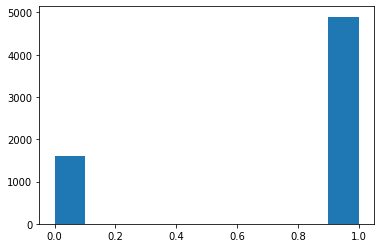

In [30]:
plt.hist(wine['종류'])

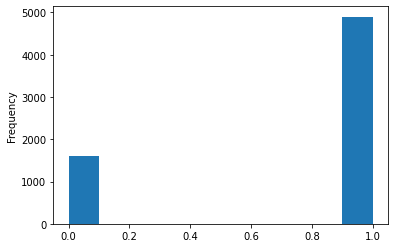

In [32]:
wine['종류'].plot.hist()

In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주석산     6497 non-null   float64
 1   초산      6497 non-null   float64
 2   구연산     6497 non-null   float64
 3   당도      6497 non-null   float64
 4   소금      6497 non-null   float64
 5   산화방지제   6497 non-null   float64
 6   총아산화황   6497 non-null   float64
 7   밀도      6497 non-null   float64
 8   산도      6497 non-null   float64
 9   황산칼륨    6497 non-null   float64
 10  알코올도수   6497 non-null   float64
 11  품질      6497 non-null   int64  
 12  종류      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [35]:
import sklearn.preprocessing as skpre

In [36]:
skpre.MinMaxScaler

sklearn.preprocessing._data.MinMaxScaler

In [54]:
minmax_scaler = skpre.MinMaxScaler()

In [55]:
minmax_scaler.fit(wine.iloc[:, :12])

MinMaxScaler()

In [53]:
wine.iloc[:, :12].shape

(6497, 12)

In [56]:
wine_ = minmax_scaler.transform(wine.iloc[:, :12])

In [63]:
wine_h_mm = pd.DataFrame(wine_, columns=han_columns)

In [65]:
wine_h_mm.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [66]:
wine_h_mm['종류'] =  0

In [68]:
wine_h_mm.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질,종류
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0


In [72]:
wine_h_mm['종류'].shape, wine['종류'].shape

((6497,), (6497,))

In [73]:
wine_h_mm['종류'] = wine['종류'].tolist()

In [74]:
wine_h_mm.head()

,주석산,초산,구연산,당도,소금,산화방지제,총아산화황,밀도,산도,황산칼륨,알코올도수,품질,종류
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0


In [75]:
wine_h_mm['종류'].value_counts()

1    4898
0    1599
Name: 종류, dtype: int64

In [76]:
import numpy as np

In [79]:
wine_shuffle = wine_h_mm.sample(frac=0.1)

In [80]:
wine_shuffle.shape

(650, 13)

In [83]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test, y_train, y_test = train_test_split(wine_h_mm.iloc[:, :12].values, wine_h_mm["종류"].values, test_size=0.33, random_state=42)

In [89]:
X_train.shape

(4352, 12)

In [90]:
type(X_train)

numpy.ndarray

In [91]:
y_train_h = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [92]:
y_test_h = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [95]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
136/136 [==============================] - 0s 858us/step - loss: 0.1163 - accuracy: 0.9600
Epoch 2/25
136/136 [==============================] - 0s 942us/step - loss: 0.0530 - accuracy: 0.9844
Epoch 3/25
136/136 [==============================] - 0s 906us/step - loss: 0.0572 - accuracy: 0.9832
Epoch 4/25
136/136 [==============================] - 0s 814us/step - loss: 0.0375 - accuracy: 0.9883
Epoch 5/25
136/136 [==============================] - 0s 803us/step - loss: 0.0374 - accuracy: 0.9908
Epoch 6/25
136/136 [==============================] - 0s 789us/step - loss: 0.0462 - accuracy: 0.9869
Epoch 7/25
136/136 [==============================] - 0s 800us/step - loss: 0.0403 - accuracy: 0.9903
Epoch 8/25
136/136 [==============================] - 0s 836us/step - loss: 0.0345 - accuracy: 0.9901
Epoch 9/25
136/136 [==============================] - 0s 926us/step - loss: 0.0380 - accuracy: 0.9901
Epoch 10/25
136/136 [==============================] - 0s 903us/step - loss: 0.036

In [99]:
import matplotlib.pyplot as plt

In [100]:
plt.figure(figsize=(12,4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

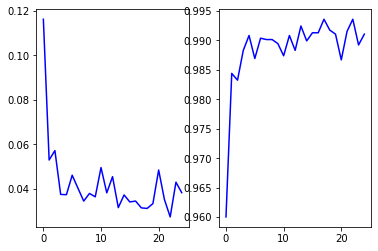

In [102]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='loss')

In [103]:
model.evaluate(X_test, y_test)

68/68 [==============================] - 0s 788us/step - loss: 0.0731 - accuracy: 0.9893


[0.07307440787553787, 0.9892773628234863]

In [108]:
X_test[100]

array([0.26446281, 0.38333333, 0.09638554, 0.02300613, 0.10797342,
       0.02430556, 0.0437788 , 0.17254675, 0.50387597, 0.18539326,
       0.24637681, 0.33333333])

In [113]:
model.predict(X_test[150].reshape(1,-1))

array([[0.21879534, 0.78120464]], dtype=float32)

In [114]:
y_test[150]

1

In [115]:
help(model.predict)

Help on method predict in module tensorflow.python.keras.engine.training:

predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Generates output predictions for the input samples.
    
    Computation is done in batches. This method is designed for performance in
    large scale inputs. For small amount of inputs that fit in one batch,
    directly using `__call__` is recommended for faster execution, e.g.,
    `model(x)`, or `model(x, training=False)` if you have layers such as
    `tf.keras.layers.BatchNormalization` that behaves differently during
    inference.
    
    Arguments:
        x: Input samples. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).